<a href="https://colab.research.google.com/github/narekmi/MachineLearning/blob/main/Assignment4_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install kmodes

In [13]:
from kmodes.kmodes import KModes
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [14]:
#Titanic Dataset (Categorical Features Only)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


In [15]:
categorical_features = ['Pclass', 'Sex', 'Embarked']
df_categorical = df[categorical_features].dropna()

# Categorical Variable encoding
encoder = LabelEncoder()
for col in df_categorical.columns:
    df_categorical[col] = encoder.fit_transform(df_categorical[col])


In [16]:
#K-Modes Clustering
cost = []
K = range(2, 10)
for k in K:
    km = KModes(n_clusters=k, init="Cao", n_init=5, verbose=0)
    km.fit(df_categorical)
    cost.append(km.cost_)

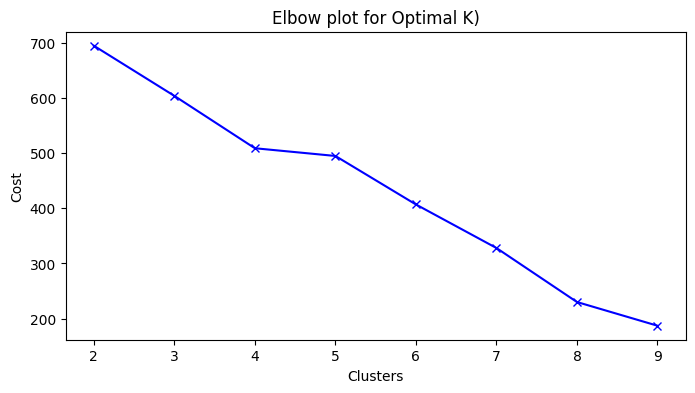

In [21]:
# Elbow Plot
plt.figure(figsize=(8, 4))
plt.plot(K, cost, "bx-")
plt.xlabel("Clusters")
plt.ylabel("Cost")
plt.title("Elbow plot for Optimal K)")
plt.show()

In [22]:
# Cluster Visualization
km = KModes(n_clusters=3, init="Cao", n_init=5, verbose=0)
labels = km.fit_predict(df_categorical)
df_categorical["Cluster"] = labels
print(df_categorical.groupby("Cluster").mean())


           Pclass       Sex  Embarked
Cluster                              
0        1.616766  0.784431  1.693114
1        0.452381  0.000000  1.386905
2        0.188679  1.000000  0.018868
